<a href="https://colab.research.google.com/github/Santanukolkata/Data_Science/blob/master/Models/Linear_Regression/Linear_Regression_Regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [51]:
from sklearn.datasets import load_boston
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import the ML algorithm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.linear_model import Ridge,Lasso,ElasticNet
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings("ignore")

In [46]:
np.set_printoptions(precision=2, linewidth=120, suppress=True, edgeitems=4)

In [32]:
# load data set
boston = load_boston()

print (boston.feature_names)
print (boston.data.shape)
print (boston.target.shape)
X      = boston.data
X_orig = boston.data

y      = boston.target

print (X)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO' 'B' 'LSTAT']
(506, 13)
(506,)
[[  0.01  18.     2.31   0.   ... 296.    15.3  396.9    4.98]
 [  0.03   0.     7.07   0.   ... 242.    17.8  396.9    9.14]
 [  0.03   0.     7.07   0.   ... 242.    17.8  392.83   4.03]
 [  0.03   0.     2.18   0.   ... 222.    18.7  394.63   2.94]
 ...
 [  0.05   0.    11.93   0.   ... 273.    21.   396.9    9.08]
 [  0.06   0.    11.93   0.   ... 273.    21.   396.9    5.64]
 [  0.11   0.    11.93   0.   ... 273.    21.   393.45   6.48]
 [  0.05   0.    11.93   0.   ... 273.    21.   396.9    7.88]]


In [36]:
dataset=pd.DataFrame(X)
dataset.columns =boston.feature_names
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [37]:
def run_model(df_selected_cols, y):
    X_train, X_test, y_train, y_test = train_test_split(df_selected_cols, y, random_state=1, test_size=0.3)    
    # instantiate
    linreg = LinearRegression()

    # fit the model to the training data (learn the coefficients)
    linreg.fit(X_train, y_train)
    
    y_pred = linreg.predict(X_test)
    
    # Model evaluation metrics for regression
    print('y-intercept             : ', linreg.intercept_)
    print('beta coefficients       : ', linreg.coef_)
    print('Mean Abs Error   MAE    : ', metrics.mean_absolute_error(y_test, y_pred))
    print('Mean Sq  Error MSE      : ', metrics.mean_squared_error(y_test, y_pred))
    print('Root Mean Sq Error RMSE : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
    print('r2 value                : ', metrics.r2_score(y_test, y_pred))
    print('MAPE                    : ', np.mean(np.abs((y_test - y_pred) / y_test)) * 100)
    # Model evaluation metrics for regression
    for col, coeff in zip(df_selected_cols.columns, linreg.coef_):
        print('{:15s} : {:8.6f}'.format(col, coeff))
    linreg1 = LinearRegression()
    mse = cross_val_score( linreg1,df_selected_cols,y,scoring='neg_mean_squared_error',cv=5)
    mean_mse=np.mean(mse)
    print('MSE:',mse)   

In [38]:
run_model(dataset,y)

y-intercept             :  46.39649387182361
beta coefficients       :  [ -0.1    0.06   0.06   2.44 -21.47   2.8    0.    -1.52   0.31  -0.01  -1.01   0.01  -0.57]
Mean Abs Error   MAE    :  3.3446655035987436
Mean Sq  Error MSE      :  19.831323672063174
Root Mean Sq Error RMSE :  4.453237437198153
r2 value                :  0.7836295385076287
MAPE                    :  16.20753603228139
CRIM            : -0.098542
ZN              : 0.060784
INDUS           : 0.059172
CHAS            : 2.439560
NOX             : -21.469965
RM              : 2.795814
AGE             : 0.003575
DIS             : -1.516272
RAD             : 0.307542
TAX             : -0.011280
PTRATIO         : -1.005466
B               : 0.006450
LSTAT           : -0.568835
MSE: [-12.46 -26.05 -33.07 -80.76 -33.31]


In [39]:
ridge=Ridge()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
ridge_regressor=GridSearchCV(ridge,parameters,scoring='neg_mean_squared_error',cv=5)
ridge_regressor.fit(X,y)

GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 0.01, 1, 5, 10,
                                   20, 30, 35, 40, 45, 50, 55, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [40]:

print(ridge_regressor.best_params_)
print(ridge_regressor.best_score_)

{'alpha': 100}
-29.905701947540344


In [41]:
lasso=Lasso()
parameters={'alpha':[1e-15,1e-10,1e-8,1e-3,1e-2,1,5,10,20,30,35,40,45,50,55,100]}
lasso_regressor=GridSearchCV(lasso,parameters,scoring='neg_mean_squared_error',cv=5)

lasso_regressor.fit(X,y)
print(lasso_regressor.best_params_)
print(lasso_regressor.best_score_)

{'alpha': 1}
-35.531580220694856


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
prediction_lasso=lasso_regressor.predict(X_test)
prediction_ridge=ridge_regressor.predict(X_test)

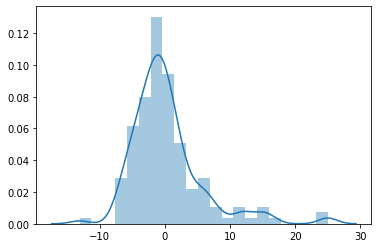

In [43]:
import seaborn as sns
sns.distplot(y_test-prediction_lasso)

In [49]:
alphas = 10**np.linspace(10,-2,100)*0.5
ridge = Ridge(normalize = True)
coefs = []
for a in alphas:
    ridge.set_params(alpha = a)
    ridge.fit(X, y)
    coefs.append(ridge.coef_)    
np.shape(coefs)


(100, 13)

In [53]:
from sklearn.linear_model import ElasticNet
alpha_values = {'alpha':[0.00005,0.0005,0.001, 0.01, 0.05, 0.06, 0.08, 1, 2, 3, 5, 8, 10, 20, 50, 100],
 'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,1]}
elastic= GridSearchCV(ElasticNet(), alpha_values, scoring='neg_mean_squared_error', cv=10 )
elastic.fit(X,y)

GridSearchCV(cv=10, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [5e-05, 0.0005, 0.001, 0.01, 0.05, 0.06, 0.08,
                                   1, 2, 3, 5, 8, 10, 20, 50, 100],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      1]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [54]:
print(elastic.best_params_)
print(elastic.best_score_)

{'alpha': 1, 'l1_ratio': 0.1}
-30.49260787129599
